# Сборный проект- 1: Определение параметров успешной игры


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года.

Необходимо провезти исследовательский анализ и проверить гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Изучение данных

Составим первое представление о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получили первые 10 строк таблицы.

Теперь получим общую информацию.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблицк 11 столбцов. Типы данных object, float. 

Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В названиях столбцов присутствует нарушение стиля.

**Вывод**

В каждой строке таблицы - данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переведем названия столбцов к нижнему регистру:

In [4]:
df.columns=df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков 

Посчитаем сколько в таблице пропущенных значений.

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки с пропуском в столбце `name`.

In [6]:
df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

Пропуски в столбце `rating` заменим на «RP» («Rating Pending») — «Рейтинг ожидается». 
Классификация ESRB появилась толкьо в 1994 году, логично что некоторые игры были без рейтинга. И проверим, что избавились от пропусков.

In [7]:
df['rating'] = df['rating'].fillna('RP')
df['rating'].isna().sum()

0

Остались пропуски в столбцах в оценками критиков и пользователей. Заменять значений медианной или средним - неккоректно,ведь это субъективная оценка. Удалять эти строки тоже не вариант, их слишком много, это сильно повлияет на результат анализа. Поэтому пропуски трогать не будем. 

Также в столбце с оценками пользователей есть значение tbd - это "to be determined". По сути это тот же пропуск. Значит заменим его на Nan.

In [8]:
df.loc[df['user_score']=='tbd','user_score'] = np.nan
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,RP
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,RP
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,RP
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,RP
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,RP


### Изменение типа данных

Заменим тип в столбце `user_score` на float, `year_of_release` на int.

In [9]:
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info() #проверим изменение типа

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Добавление столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`

In [10]:
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['other_sales'] + df['eu_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод 

Произвели предобработку данных, избавелись от пропусков там где это было необходимо, изменили тип данных в столбцах и добавили новый столбец с суммарными продажами во всех регионах. Это упростит нам дальшеющую работу с данными.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

Посмотрим сколько игр выпускалось в разные годы. Построим гистограмму.

Text(0.5, 0, 'Год')

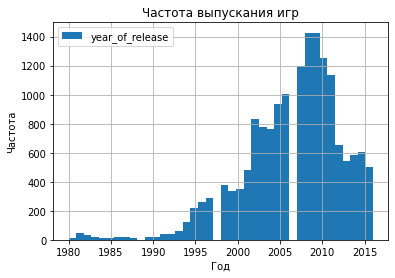

In [11]:
df.plot(y='year_of_release', kind='hist', grid=True, bins=40, range=[1980,2016])
plt.title('Частота выпускания игр')
plt.ylabel('Частота')
plt.xlabel('Год')

In [12]:
df.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


**Вывод**

Игры начали выпускать с 1980 года. С ростом возможностей начало и расти производство видеоигр. с 2002 по 2011 год выпускалось наибольшее количество игр. Дальше пошел спад, возможно из-за перенасыщения рынка, либо из-за развития мобильных игр и приложений. Можно рассматривать данные начиная с 2002 года, до этого времени колличество выпущенных игр было мало.

### Как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами.

In [13]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Наибольшие суммарные продажи были для платформ PS2, X360, PS3, Wii, DS, . Построим распределения по годам для этих платформ.

Text(0.5, 0, 'Год')

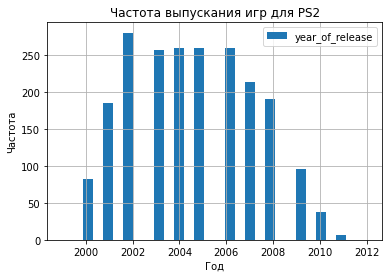

In [14]:
platform_ps2 = df.query('platform == "PS2"')
platform_ps2.plot(y='year_of_release', kind='hist',grid=True, bins=30, range=[1999,2012])
plt.title('Частота выпускания игр для PS2')
plt.ylabel('Частота')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

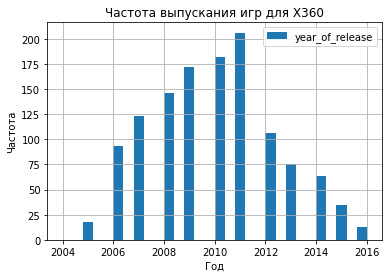

In [15]:
platform_x360 = df.query('platform == "X360"')
platform_x360.plot(y='year_of_release', kind='hist', grid=True, bins=30, range=[2004,2016])
plt.title('Частота выпускания игр для X360')
plt.ylabel('Частота')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

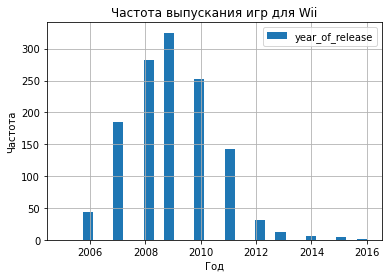

In [16]:
platform_wii = df.query('platform == "Wii"')
platform_wii.plot(y='year_of_release', kind='hist', grid=True, bins=30, range=[2005,2016])
plt.title('Частота выпускания игр для Wii')
plt.ylabel('Частота')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

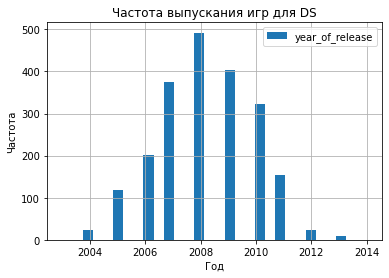

In [17]:
platform_ds = df.query('platform == "DS"')
platform_ds.plot(y='year_of_release', kind='hist', grid=True, bins=30, range=[2003,2014])
plt.title('Частота выпускания игр для DS')
plt.ylabel('Частота')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

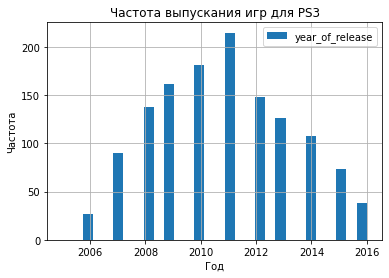

In [18]:
platform_ps3 = df.query('platform == "PS3"')
platform_ps3.plot(y='year_of_release', kind='hist', grid=True, bins=30, range=[2005,2016])
plt.title('Частота выпускания игр для PS3')
plt.ylabel('Частота')
plt.xlabel('Год')

* Для PS2 выпускались игры с 2000 по 2010 год;
* Для Х360 с 2005 по 2016;
* Для Wii с 2006 по 2012;
* Для DS c 2004 по 2012;
* Для PS3 c 2006 по 2016. 

**Вывод** 

На основании этого можно сделать вывод, что примерно за 9 лет появляются новые и изчезают старые платформы. Если судить по продажам видеоигр. 

### Прогноз на 2017 год

Возьмем данные за соответствующий актуальный период. Как видно из предыдущего пункта срок существования платформ примерно 10 лет. Поэтому для прогноза на 2017 год возьмем период в 2 года, чтобы не захватить уже отжившие тредны. Значит актуальный период  2015-2016.

In [19]:
good_df = df.query('year_of_release >= 2015')
good_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,RP,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


#### Выбор нескольких потенциально прибыльных платформ

Cоздадим сводную таблицу

In [20]:
df_pivot = good_df.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc='sum').fillna(0)
df_pivot.head(10)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Поистроим график с объемами продаж на разных платформах по годам.

Text(0, 0.5, 'Объём продаж за год')

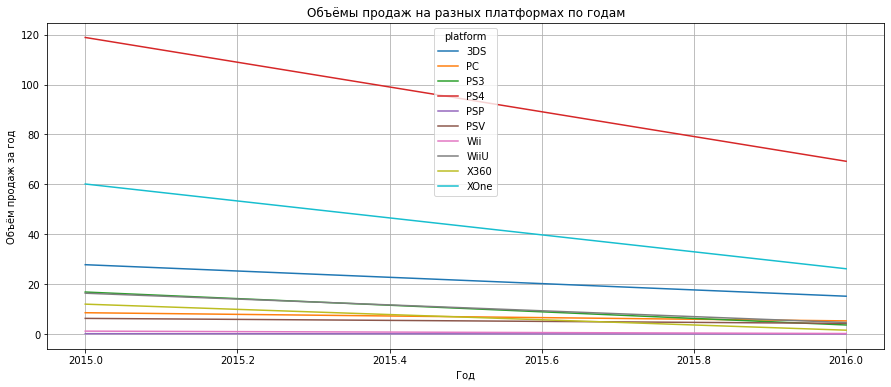

In [21]:
df_pivot.plot(grid=True, style='-', figsize=(15,6))
plt.title('Объёмы продаж на разных платформах по годам')
plt.xlabel('Год')    
plt.ylabel('Объём продаж за год')

**Вывод**

Исходя из графика видно, что такие популярные и прибыльные платформы как X360, Wii, PS3 уже прошли свой пик(напомню, что примерное время существование платформы взяли за 9 лет) и за актуальный период их продажи близятся к 0. 

Однако, мы можем увидеть прибыльные платформы, которые на данный период являются актуальными. Это такие как PS4 и XOne. 3DS также достаточно потенциальные, но в меньших объемах.

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Построим «ящик с усами» по глобальным продажам топ платформ за актуальный период. Для этого создадим список с популярными платформами за актуальный период и будем строить график для этих платформ.

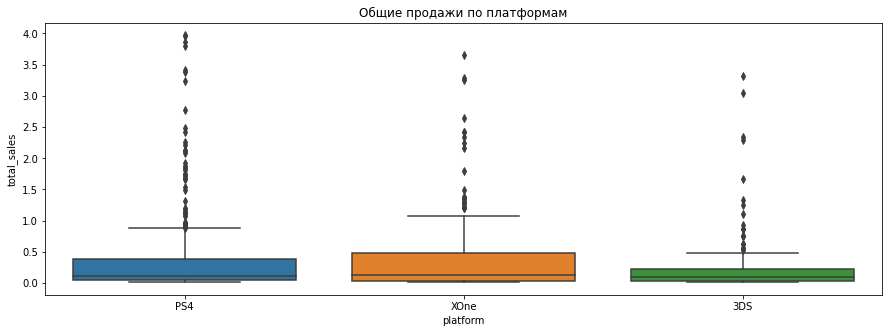

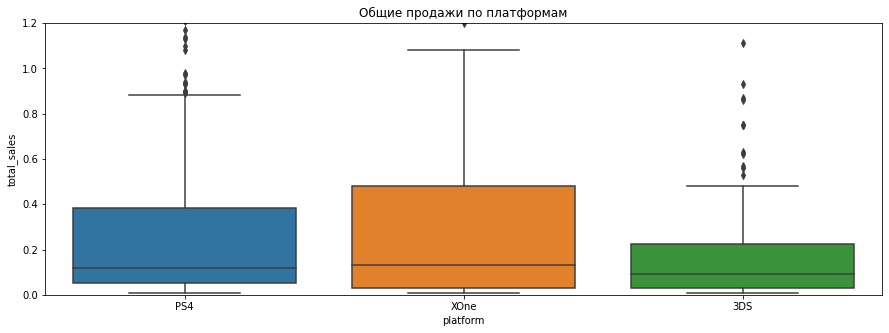

In [22]:
top_platforms = ['PS4', 'XOne', '3DS']
plt.figure(figsize=(15,5))
sns.boxplot(y='total_sales', x='platform',
            data = good_df.query('platform in @top_platforms and total_sales < 4')
            ,order=top_platforms
           )
plt.title('Общие продажи по платформам')
plt.show()

top_platforms = ['PS4', 'XOne', '3DS']
plt.figure(figsize=(15,5))
sns.boxplot(y='total_sales', x='platform',
            data = good_df.query('platform in @top_platforms and total_sales < 4')
            ,order=top_platforms
           )
plt.ylim(0,1.2)
plt.title('Общие продажи по платформам')
plt.show()

**Вывод**

Продажи на популярных платформах схожи. Медианные значения у PS4,XOne находятся близко к 0,1. На платформе 3DS меньший разброс цен. Разброс выручки от игр на XOne чуть больше остальных.

#### Влияние отзывывов пользователей и критиков на продажи внутри одной популярной платформы 

Рассмотрим как влияют отзывы на продажи на платформе PS4. Для этого создадим отдельный датафрейм.

In [23]:
df_ps4 = good_df.query('platform == "PS4"')
df_ps4.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.0,69.0,7.5,RP,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,RP,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.0,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.0,51.0,5.5,M,0.01
16585,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.00,0.0,NaN,NaN,RP,0.01


* Посмотрим зависимость между прожами и оценками критиков и посчитаем корреляцию.

<AxesSubplot:title={'center':'Зависимость продаж от оценок критиков для PS4'}, xlabel='critic_score', ylabel='total_sales'>

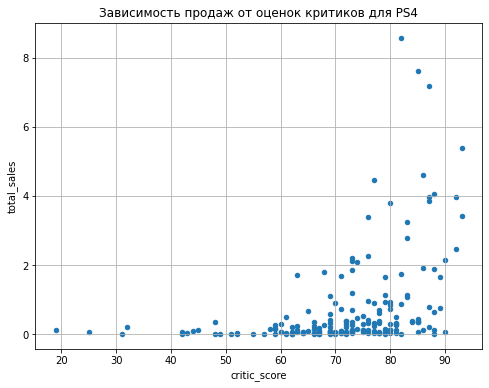

In [24]:
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(8, 6), title= 'Зависимость продаж от оценок критиков для PS4')


In [25]:
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.3928485555130599

Коэффициент корреляции Пирсона 0,39 говорит о наличии сзязи, однако очень слабой.

* Посмотрим зависимость между отзывами пользователей и продаж.

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей для PS4'}, xlabel='user_score', ylabel='total_sales'>

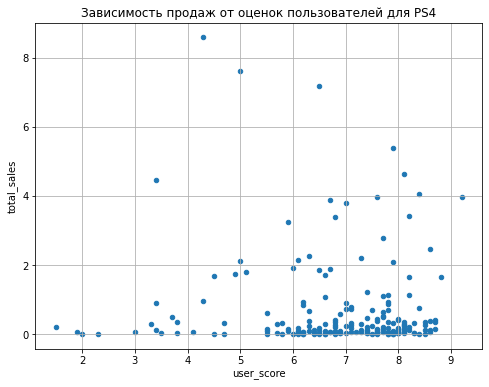

In [26]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 6), grid=True, title= 'Зависимость продаж от оценок пользователей для PS4')

In [27]:
df_ps4['user_score'].corr(df_ps4['total_sales'])

-0.05973845712638214

Коэффициент Пирсона -0.06 связь отсутствует.

**Вывод**

Критики как правило более благосклонны к играм. В то время как зависимость между отзывами пользователей и продажами почти не прослеживается. Пользователи более критичны в своих оценках.

#### Продажи игр на других платформах

Посмотрим как влияют отзывы критиков и пользователей на продажи игр на других платформах.

* Посмотрим зависимость между продажами и оценками критиков и посчитаем корреляцию.

<AxesSubplot:title={'center':'Зависимость продаж от оценок критиков для других платформ'}, xlabel='critic_score', ylabel='total_sales'>

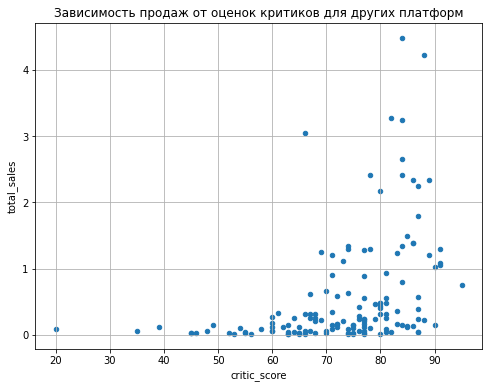

In [28]:
good_df.query('platform in @top_platforms and platform != "PS4"').plot(
    x='critic_score', y='total_sales', kind='scatter',
    figsize=(8, 6), grid=True, title='Зависимость продаж от оценок критиков для других платформ')

In [29]:
good_df.query('platform in @top_platforms and platform != "PS4"').pivot_table(
    index='platform',values=['critic_score','total_sales'], aggfunc='corr').drop(columns = ['total_sales'],axis = 1)

critic_score
platform                           
3DS      critic_score      1.000000
         total_sales       0.177575
XOne     critic_score      1.000000
         total_sales       0.430889

Судя по коэффициентам корреляции зависимость между продажами и оценками критиков есть, однако очень слабая.

* Посмотрим зависимость между продажами и оценками пользователей и посчитаем корреляцию.

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей для других платформ'}, xlabel='user_score', ylabel='total_sales'>

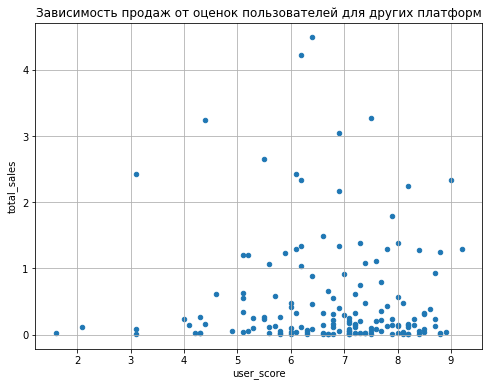

In [30]:
good_df.query('platform in @top_platforms and platform != "PS4"').plot(
    x='user_score', y='total_sales', kind='scatter',
    figsize=(8, 6), grid=True, title='Зависимость продаж от оценок пользователей для других платформ')

In [31]:
good_df.query('platform in @top_platforms and platform != "PS4"').pivot_table(
    index='platform',values=['user_score','total_sales'], aggfunc='corr').drop(columns = ['total_sales'],axis = 1)

user_score
platform                        
3DS      user_score     1.000000
         total_sales    0.198796
XOne     user_score     1.000000
         total_sales   -0.041467

Судя по коэффициентам корреляции зависимости между продажами и оценками пользавателей нет.

**Вывод**



Схожие тенденции имеют место почти для всех платформ. Отзывы критиков слабо, но влияют на продажи(кроме платформы PSV), а отзывы пользователей на продажи не влияют(кроме платформы WiiU).

#### Oбщее распределение игр по жанрам

Создадим сводную таблицу сводную таблицу с едианными продажами по каждому жанру.

In [32]:
genre_df = good_df.pivot_table(index='genre', values='total_sales',aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_df.columns = ['median']
genre_df

,median
genre,
Shooter,0.380
Sports,0.120
Role-Playing,0.115
Platform,0.100
Simulation,0.100
Fighting,0.090
Action,0.060
Misc,0.060
Racing,0.055


Построим диаграмму размаха, чтобы оценить прибыльность жанров.

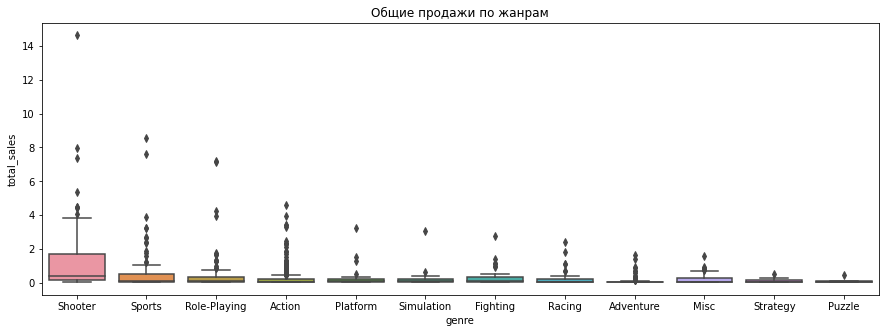

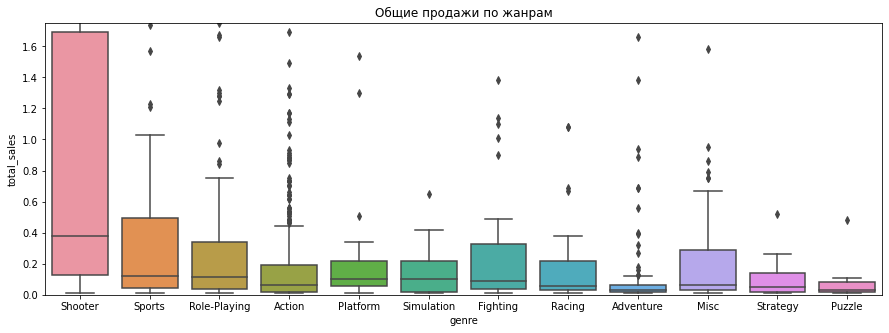

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(y='total_sales', x='genre', data=good_df)
plt.title('Общие продажи по жанрам')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(y='total_sales', x='genre', data=good_df)
plt.ylim(0,1.75)
plt.title('Общие продажи по жанрам')
plt.show()

**Вывод**

Из диаграммы видно, что наиболее прибыльные жанры для актуального периода: Shooter, Sports, Role-Playing, Platform и Simulation. Самым прибыльным из них является Shooter.

## Составление портрета пользователя для каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

Посмотрим топ-5 самых популярных платформ в Северной Америке, Европе и Японии. Для этого сгруппируем данные и по ним построим графики.

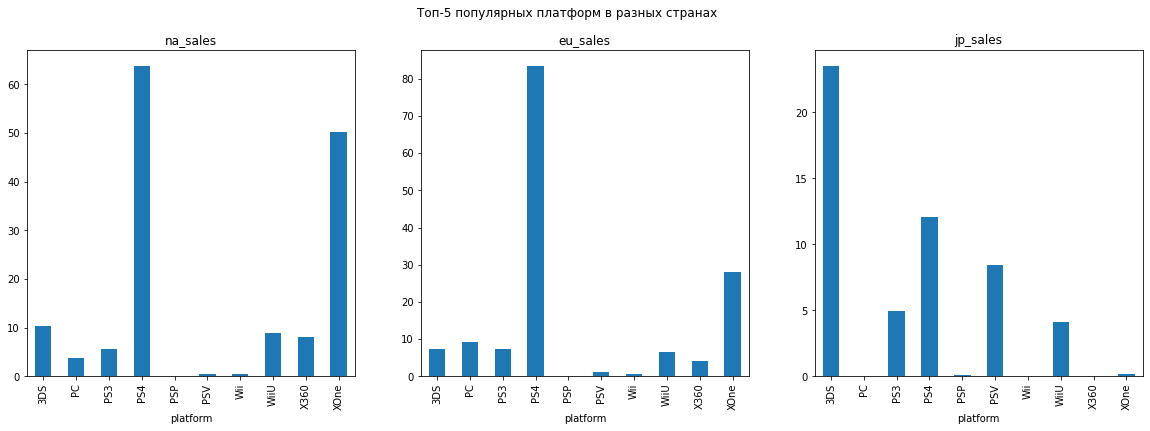

In [34]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
countries = ['N-A', 'Eu','Jp']
fig, axs = plt.subplots(nrows = 1, ncols =3, figsize=(20,6))
fig.suptitle('Топ-5 популярных платформ в разных странах')
for i, sale in enumerate(sales):
    for country in countries:
        good_df.groupby('platform')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)

* Популярные платформы в Северной Америке: PS4, XOne, 3DS, WiiU, X360

* Популярные платформы в Европе: PS4, XOne, PC, 3DS, PS3

* Популярные платформы в Японии: 3DS, PS4, PSV, WiiU, PS3





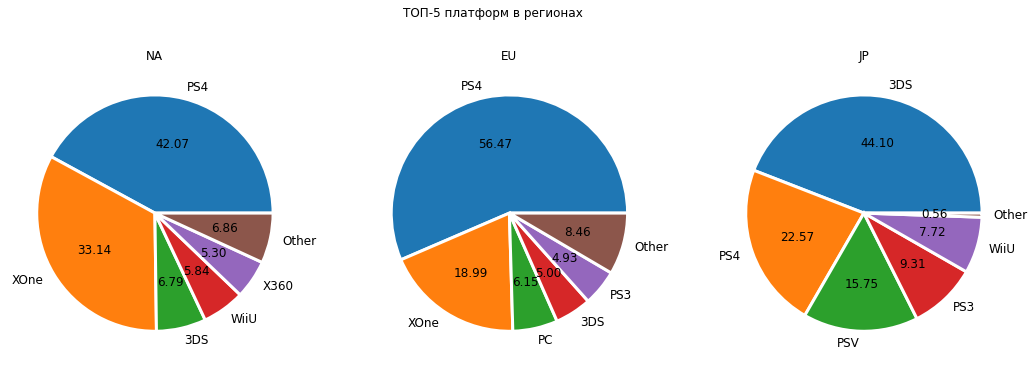

In [35]:
# задаем список регионов
countries = good_df.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
    df_i = (good_df.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
    df_i = (df_i.append({'platform': 'Other', countries[i]: good_df[countries[i]].sum() 
                       - df_i[countries[i]].sum()}, ignore_index= True)
         )
    
    axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%.2f',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})

  # Зададим название региона.
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
    
plt.show()

### Самые популярные жанры (топ-5)

Посмотрим топ-5 самых популряных жанров в Северной Америке, Европе и Японии

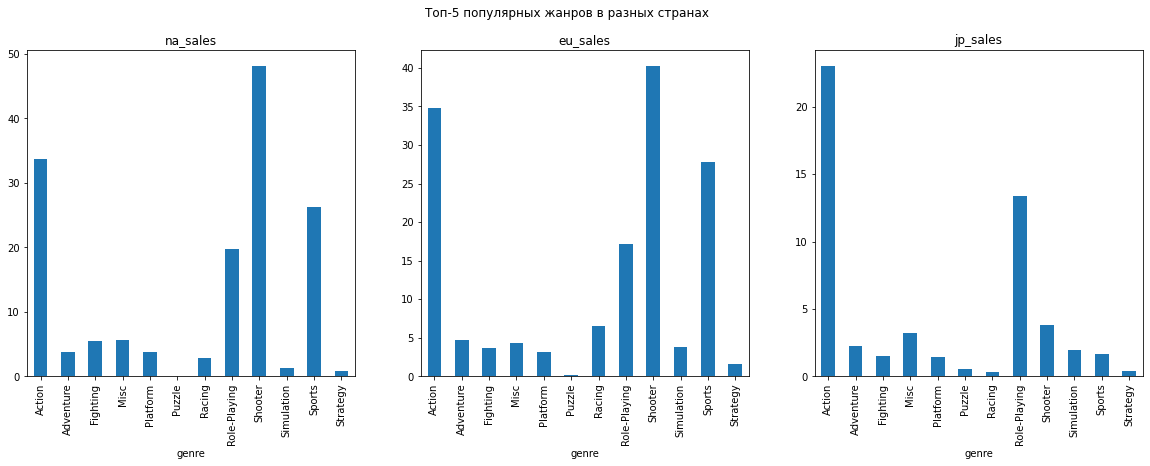

In [36]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
countries = ['N-A', 'Eu','Jp']
fig, axs = plt.subplots(nrows = 1, ncols =3, figsize=(20,6))
fig.suptitle('Топ-5 популярных жанров в разных странах')
for i, sale in enumerate(sales):
    for country in countries:
        good_df.groupby('genre')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)

* В Северной Америке популярны такие жанры как Shooter, Action, Sports, Role-Playing, Misc.
* В Европе Shooter, Action, Sports, Role-Playing, Racing.
* В Японии Action, Role-Playing, Shooter, Misc, Sports, Adventure.

**Вывод** 

В Северной Америке и Европе предпочтения очень схожи, за исключением того, что в Северной Америке любят Misc, а в Европе предпочитают гонки.

В Японии дела обстоят немного иначе. Самый популрный жанр - экшен, на втором месте ролевые игры.  

### Влияние рейтинга ESRB на продажи в отдельном регионе

* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех» 
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

Создадим сводную таблицу и посмотрим влияние рейтинга на продажи.

In [37]:
good_df.pivot_table(index='rating', values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
M,45.54,4.29,47.03
RP,35.71,32.89,37.44
T,20.32,7.70,22.86


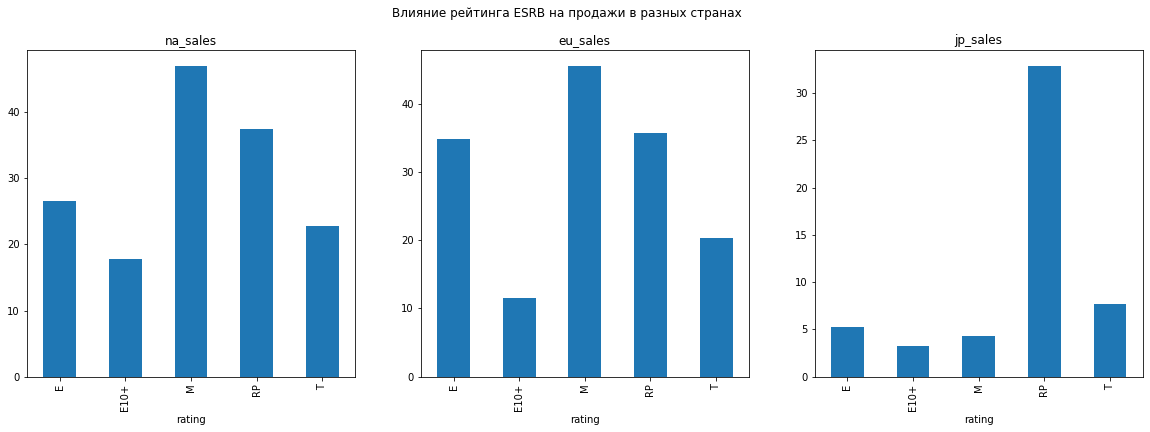

In [38]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
countries = ['N-A', 'Eu','Jp']
fig, axs = plt.subplots(nrows = 1, ncols =3, figsize=(20,6))
fig.suptitle('Влияние рейтинга ESRB на продажи в разных странах')
for i, sale in enumerate(sales):
    for country in countries:
        good_df.groupby('rating')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)

**Вывод**

Самым популярный рейтингом для Северной Америки и Европы является «М», в то время как для Японии на первом месте рейтинг «T».

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки гипотезы воспользуемся методом `scipy.stats.ttest_ind` т.к мы имеем две независимые генеральные совокупности.

Для начала полностью избавимся от пропусков в датафрейме. Данные больше не пригодятся нам для анализа, а пропуски в столбце `user_score` помешают проверке гипотезы.

In [39]:
new_df = good_df.dropna()
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62


In [40]:
alpha = .05
results = st.ttest_ind(
    new_df[new_df['platform'] == 'XOne']['user_score'],new_df[new_df['platform'] == 'PC']['user_score'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.3431338388627947
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 34%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами. 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
* H1: Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы воспользуемся методом `scipy.stats.ttest_ind` т.к мы имеем две независимые генеральные совокупности.

In [41]:
alpha = .05
results = st.ttest_ind(
    new_df[new_df['genre'] == 'Action']['user_score'],new_df[new_df['genre'] == 'Sports']['user_score'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 7.438306158797003e-06
Отвергаем нулевую гипотезу


**Вывод**

Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Полученный результат является статистически значимым, поскольку р-значение ниже, чем альфа.

Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В ходе проекта были изучены и обработанны данные по продажам игра:
* Произведена предобработка исходного датасета поменяли стиль заголовков, обработали пропуски, изменили типы данных в необходимых столбцах и добавили новый столбец суммарных продаж во всех регионах;
* Посчитано сколько игр выпускалось в разные года;
* Как менялись продажи по платформам; 
* Определена скорость устаревания платформ. В среднем современные консоли устаревают за 9 лет;
* Выбрали несколько потенциальных платформ(PS4, XOne, 3DS) и посмотрели для них зависимость продаж от отзывов пользователей и критиков;
* Составили портрет пользователя для Северно Америки, Европы и Японии;
* Проверели гипотезы и установили что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

На основании анализа можно сделать прогноз успешной игры на 2017 год:

Стратегии будут отличаться для различных регионов, но можно обобщить.
Самыми популярными жанрами являются Shooter и Action. Наиболее прибыльный жанр для актуального периода: Shooter. Самые популярные платформы PS4 и XOne. Отзывы критиков немного могут влиять на продажи видеоигр.